<a href="https://colab.research.google.com/github/Aishwaryakonkala/AIML-24-25/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

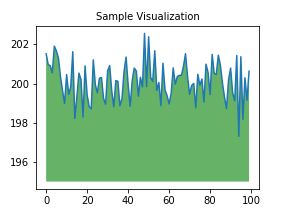

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns",None)

In [11]:

file_path = '/content/Bike_Price_Prediction.xlsx'
df = pd.read_excel(file_path)

In [9]:
df.head()

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220CC,10 Litres,113000
1,2,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120CC,11 Litres,70000
2,3,Hero,Passion,2020,5.0,Boxer,Petrol,140CC,12 Litres,85000
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150CC,13 Litres,90000
4,5,Suzuki,Access,2020,5.0,V-twin,Petrol,350CC,14 Litres,65000


In [10]:
df.isnull().sum()

,0
S.no,0
Bike_company,0
Bike_model,0
Manufactured_year,0
Engine_warranty,2
Engine_type,0
Fuel_type,0
CC(Cubic capacity),0
Fuel_Capacity,1
Price,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.no                308 non-null    int64  
 1   Bike_company        308 non-null    object 
 2   Bike_model          308 non-null    object 
 3   Manufactured_year   308 non-null    int64  
 4   Engine_warranty     306 non-null    float64
 5   Engine_type         308 non-null    object 
 6   Fuel_type           308 non-null    object 
 7   CC(Cubic capacity)  308 non-null    object 
 8   Fuel_Capacity       307 non-null    object 
 9   Price               308 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 24.2+ KB


In [13]:
df['Engine_warranty'].fillna(df['Engine_warranty'].mean(), inplace=True)

In [14]:
df['Fuel_Capacity'].fillna(df['Fuel_Capacity'].mode()[0], inplace=True)

In [15]:
df.isnull().sum()


,0
S.no,0
Bike_company,0
Bike_model,0
Manufactured_year,0
Engine_warranty,0
Engine_type,0
Fuel_type,0
CC(Cubic capacity),0
Fuel_Capacity,0
Price,0


In [16]:
df.describe()

,S.no,Manufactured_year,Engine_warranty,Price
count,308.000000,308.000000,308.000000,3.080000e+02
mean,154.496753,2010.847403,6.032680,2.548416e+05
std,89.059088,104.747343,3.707407,2.950174e+05
min,1.000000,202.000000,2.000000,5.000000e+04
25%,77.750000,2017.000000,4.000000,7.500000e+04
50%,154.500000,2019.000000,5.000000,1.045000e+05
75%,231.250000,2020.000000,8.000000,3.412500e+05
max,308.000000,2050.000000,50.000000,1.779990e+06


In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(308, 10)

In [19]:
df.count()

,0
S.no,308
Bike_company,308
Bike_model,308
Manufactured_year,308
Engine_warranty,308
Engine_type,308
Fuel_type,308
CC(Cubic capacity),308
Fuel_Capacity,308
Price,308


In [20]:
df.head()

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220CC,10 Litres,113000
1,2,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120CC,11 Litres,70000
2,3,Hero,Passion,2020,5.0,Boxer,Petrol,140CC,12 Litres,85000
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150CC,13 Litres,90000
4,5,Suzuki,Access,2020,5.0,V-twin,Petrol,350CC,14 Litres,65000


In [21]:
df.drop('S.no', axis=1, inplace=True)

In [22]:
df.head()

,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220CC,10 Litres,113000
1,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120CC,11 Litres,70000
2,Hero,Passion,2020,5.0,Boxer,Petrol,140CC,12 Litres,85000
3,Honda,Activa 3G,2020,5.0,Single,Petrol,150CC,13 Litres,90000
4,Suzuki,Access,2020,5.0,V-twin,Petrol,350CC,14 Litres,65000


In [23]:
numerical_columns=df.columns[df.dtypes !='object']
categorical_columns = df.columns[df.dtypes =='object']

In [24]:
print("numerical_columns",numerical_columns)
print("categorical_columns",categorical_columns)

numerical_columns Index(['Manufactured_year', 'Engine_warranty', 'Price'], dtype='object')
categorical_columns Index(['Bike_company', 'Bike_model', 'Engine_type', 'Fuel_type',
       'CC(Cubic capacity)', 'Fuel_Capacity'],
      dtype='object')


In [25]:
df.head()

,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220CC,10 Litres,113000
1,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120CC,11 Litres,70000
2,Hero,Passion,2020,5.0,Boxer,Petrol,140CC,12 Litres,85000
3,Honda,Activa 3G,2020,5.0,Single,Petrol,150CC,13 Litres,90000
4,Suzuki,Access,2020,5.0,V-twin,Petrol,350CC,14 Litres,65000


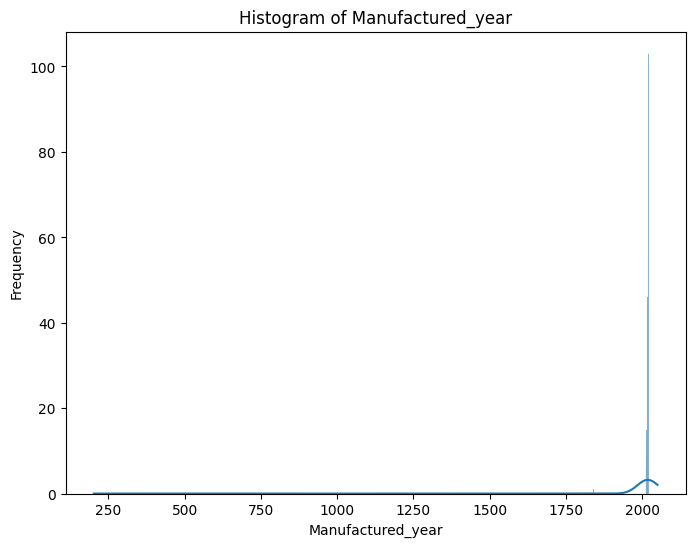

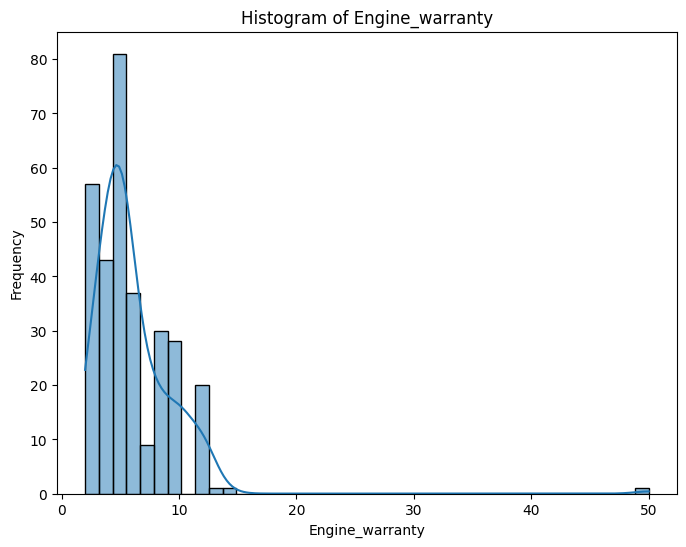

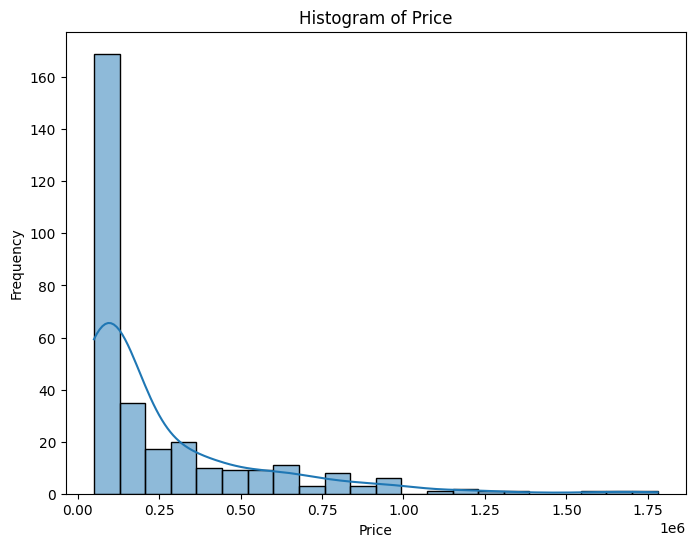

In [26]:
for column in numerical_columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

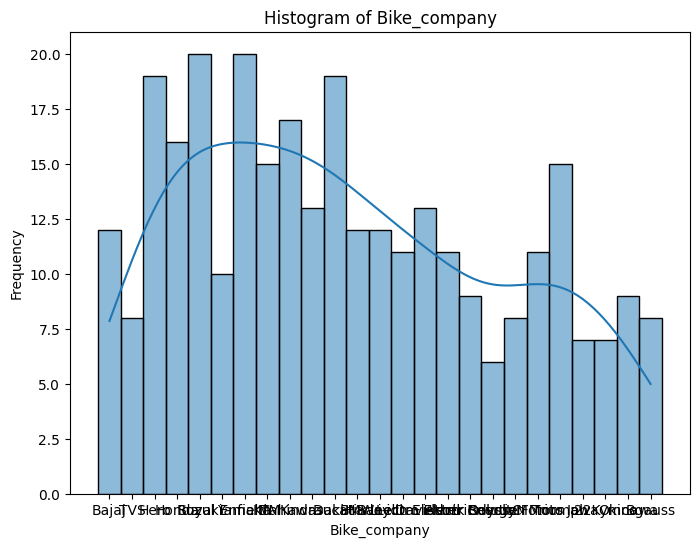

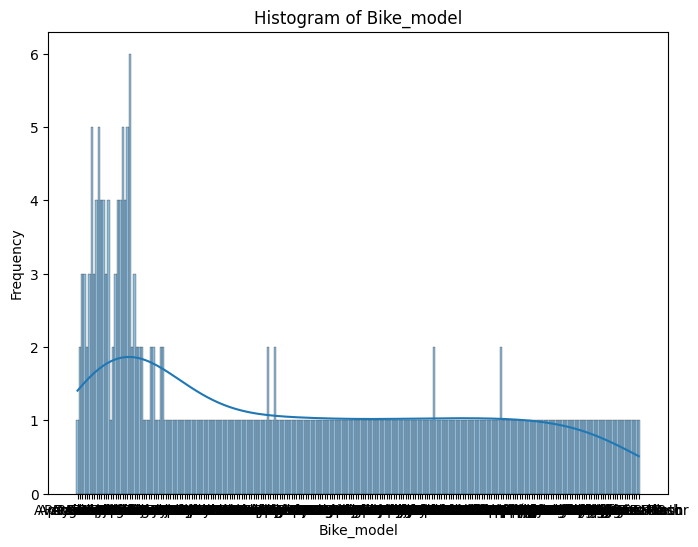

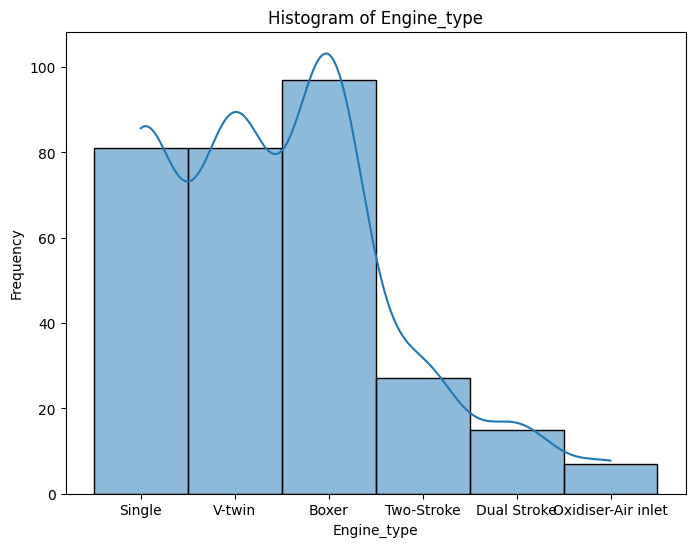

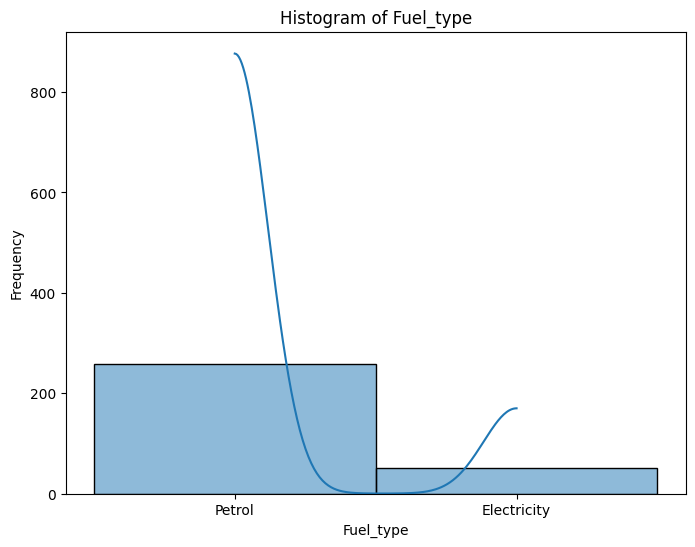

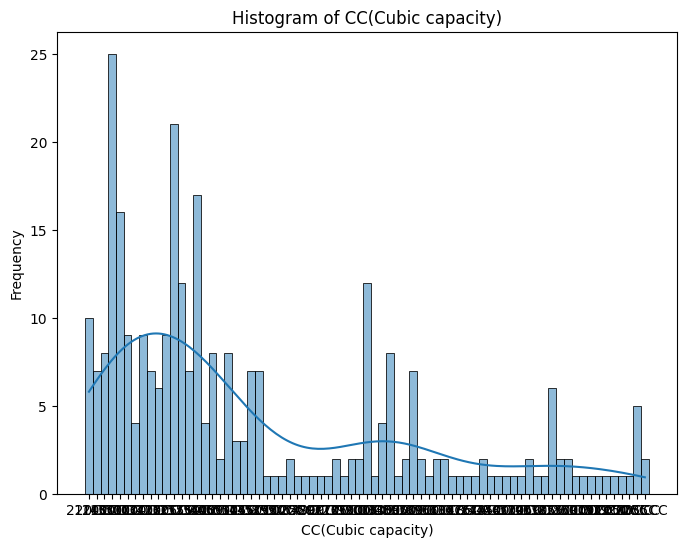

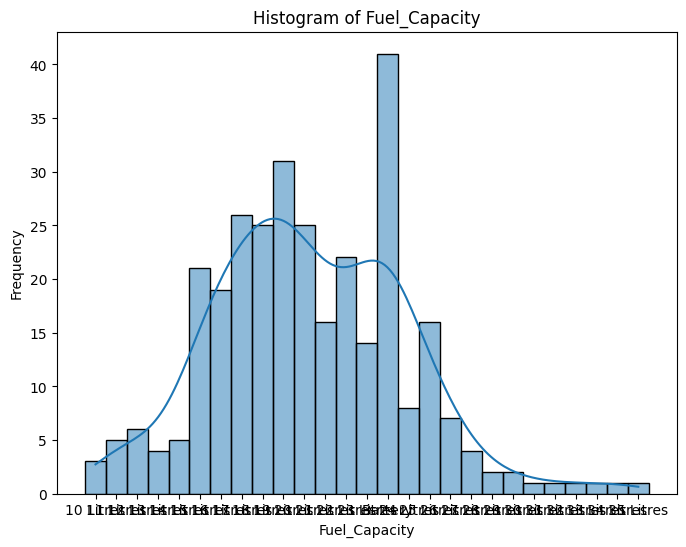

In [27]:
for column in categorical_columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

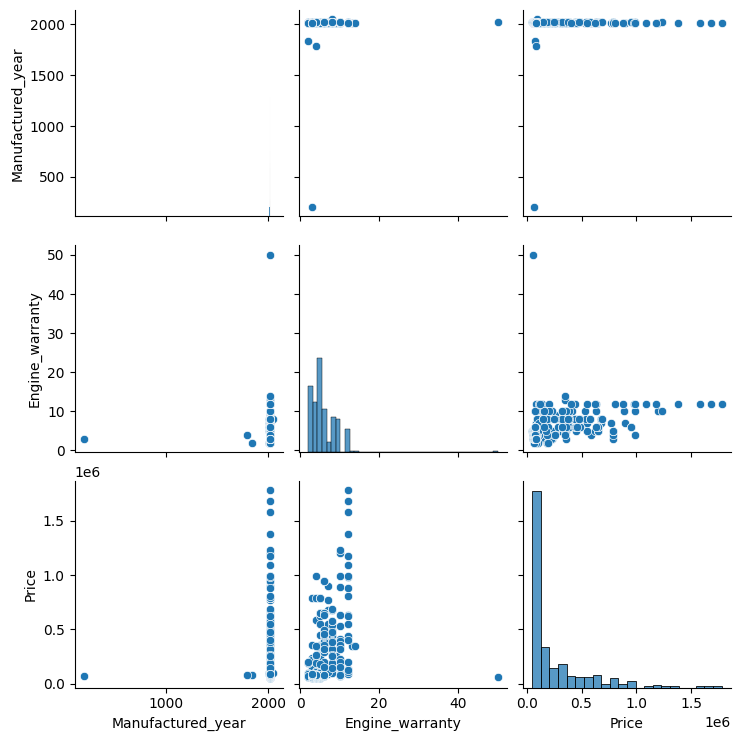

In [28]:
sns.pairplot(df)

In [29]:
df.head()

,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220CC,10 Litres,113000
1,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120CC,11 Litres,70000
2,Hero,Passion,2020,5.0,Boxer,Petrol,140CC,12 Litres,85000
3,Honda,Activa 3G,2020,5.0,Single,Petrol,150CC,13 Litres,90000
4,Suzuki,Access,2020,5.0,V-twin,Petrol,350CC,14 Litres,65000


In [30]:
df['Bike_company'].unique()

array(['Bajaj', 'TVS', 'Hero', 'Honda', 'Suzuki', 'Royal Enfield',
       'Yamaha', 'KTM', 'Mahindra', 'Kawasaki', 'Ducati', 'BMW',
       'Banelli', 'Harley Davidson', 'Lectro Electric',
       'Li-ion Elektrik Solution', 'Ather Energy', 'Odysse',
       'Revolt Motors', 'CFMoto', 'Triumph', 'Jawa', '22Kymco', 'Okinawa',
       'Bgauss'], dtype=object)

In [31]:
df['CC(Cubic capacity)'].unique()

array(['220CC', '120CC', '140CC', '150CC', '350CC', '300CC', '100CC',
       '170CC', '320CC', '420CC', '130CC', '125CC', '155CC', '175CC',
       '250CC', '360CC', '400CC', '469CC', '500CC', '550CC', '145CC',
       '135CC', '450CC', '525CC', '895CC', '990CC', '1025CC', '1225CC',
       '649CC', '729CC', '899CC', '917CC', '210CC', '275CC', '390CC',
       '190CC', '200CC', '10CC', '160CC', '340CC', '380CC', '590CC',
       '650CC', '700CC', '890CC', '900CC', '560CC', '134CC', '167CC',
       '176CC', '1350CC', '270CC', '425CC', '440CC', '240CC', '370CC',
       '520CC', '195CC', '409CC', '110CC', '185CC', '225CC', '180CC',
       '750CC', '600CC', '979CC', '1000CC', '679CC', '1200CC', '1250CC',
       '230CC', '205CC', '235CC'], dtype=object)

In [32]:
df['Bike_model'].unique()

array(['Avenger 220', 'Apache RTR', 'Passion', 'Activa 3G', 'Access',
       'Royal Enfield', 'Fascino', 'KTM RC ', 'Gusto', 'Ninja',
       'Scrambler', 'G 310 R', 'Limperiale', 'Davidson Street', 'Gold',
       'Silver', 'Energitic', 'Pulsar', 'Jupiter', 'Glamour', 'Shine',
       'Gixer', 'Bullet', 'FZ-S', 'Duke', 'Mojo', 'Vulcon', 'Panigale',
       '310 GS', 'Leoncino', 'Davidson Iron', 'Leon', 'Ceon', 'Neon',
       'Gutter', 'Flutter', 'Shutter', 'Jojo', 'Fat boy', 'Forty Eight',
       'Low Rider', 'Low Rider S', 'TRK 502', '1200 Custom', 'Imperiale',
       'TRK 550', 'F 900 R', 'F 990 XR', 'G 310 S', 'G 320 X', 'Versys',
       'G 900', 'Adventure', 'Duke 390', 'Duke 125', 'Duke 300',
       'Splendor', 'Activa 5G', 'Unicorn', 'Livo', 'Hornet', 'X-Blade',
       'Delux', 'Xtreme', 'Pulse', 'Thunder', 'Destini', 'Prime', 'Power',
       'Kurrent', 'Sunny', 'Deon', 'Feon', 'Essentia', 'Guide', 'Pride',
       'XSL', 'Peppy', 'Zeddy', 'Tumbler', 'StreetFighter', 'MultiStrada',
 

In [33]:
df['Engine_type'].unique()

array(['Single', 'V-twin', 'Boxer', 'Two-Stroke', 'Dual Stroke',
       'Oxidiser-Air inlet'], dtype=object)

In [34]:
df['Fuel_type'].unique()

array(['Petrol', 'Electricity'], dtype=object)

In [35]:
df.head()


,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220CC,10 Litres,113000
1,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120CC,11 Litres,70000
2,Hero,Passion,2020,5.0,Boxer,Petrol,140CC,12 Litres,85000
3,Honda,Activa 3G,2020,5.0,Single,Petrol,150CC,13 Litres,90000
4,Suzuki,Access,2020,5.0,V-twin,Petrol,350CC,14 Litres,65000


In [36]:
top_ten_expensive_company = df.groupby("Bike_company")["Price"].mean().sort_values(ascending=True).reset_index().head(10)
top_ten_expensive_company

,Bike_company,Price
0,22Kymco,61785.000000
1,Odysse,65516.500000
2,Li-ion Elektrik Solution,66790.909091
3,Ather Energy,71377.777778
4,Okinawa,71892.777778
5,Hero,74944.157895
6,Mahindra,78799.352941
7,Lectro Electric,81169.230769
8,Honda,82155.875000
9,Bgauss,82291.000000


<Axes: xlabel='Bike_company', ylabel='Price'>

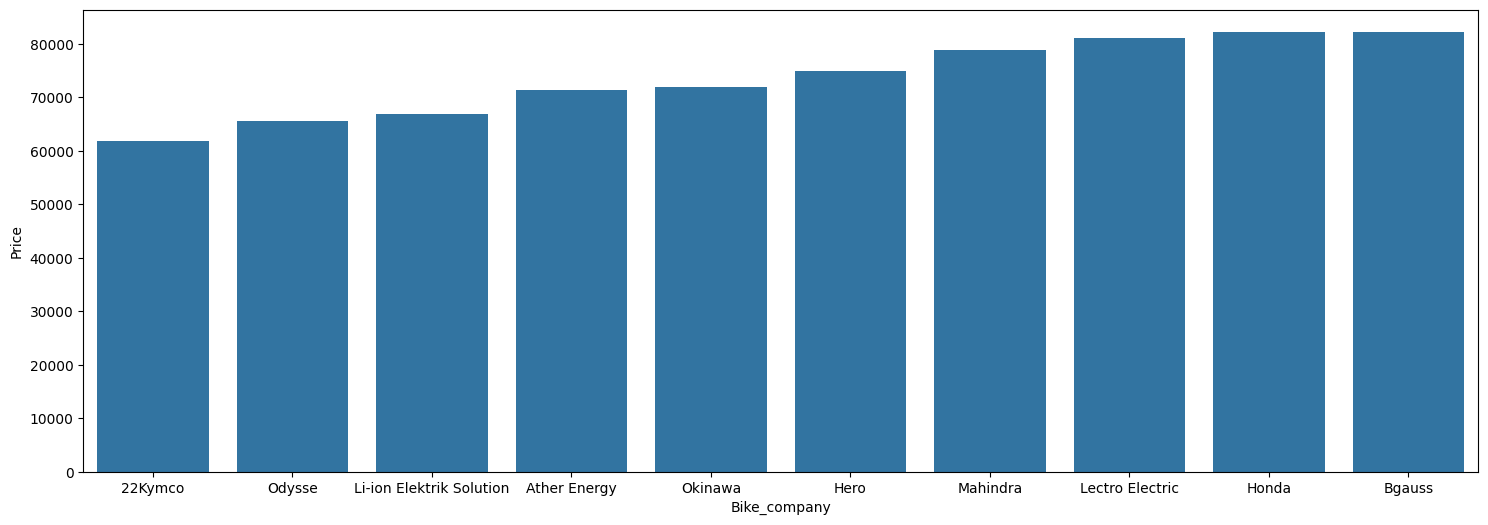

In [37]:
plt.figure(figsize=(18,6))
sns.barplot(x="Bike_company",y="Price",data=top_ten_expensive_company)

In [38]:
top_ten_expensive_bike_model = df.groupby("Bike_model")["Price"].mean().sort_values(ascending=True).reset_index().head(10)
top_ten_expensive_bike_model

,Bike_model,Price
0,Odysse Electric Evoqis,50000.0
1,iFlow,54700.0
2,Raina,54800.0
3,Pulse,55000.0
4,Odysse Electric Evoqis XS,55000.0
5,Mojo CM,55000.0
6,Flow,55000.0
7,Thunder,56700.0
8,Power,56700.0
9,Prime,61000.0


<Axes: xlabel='Bike_model', ylabel='Price'>

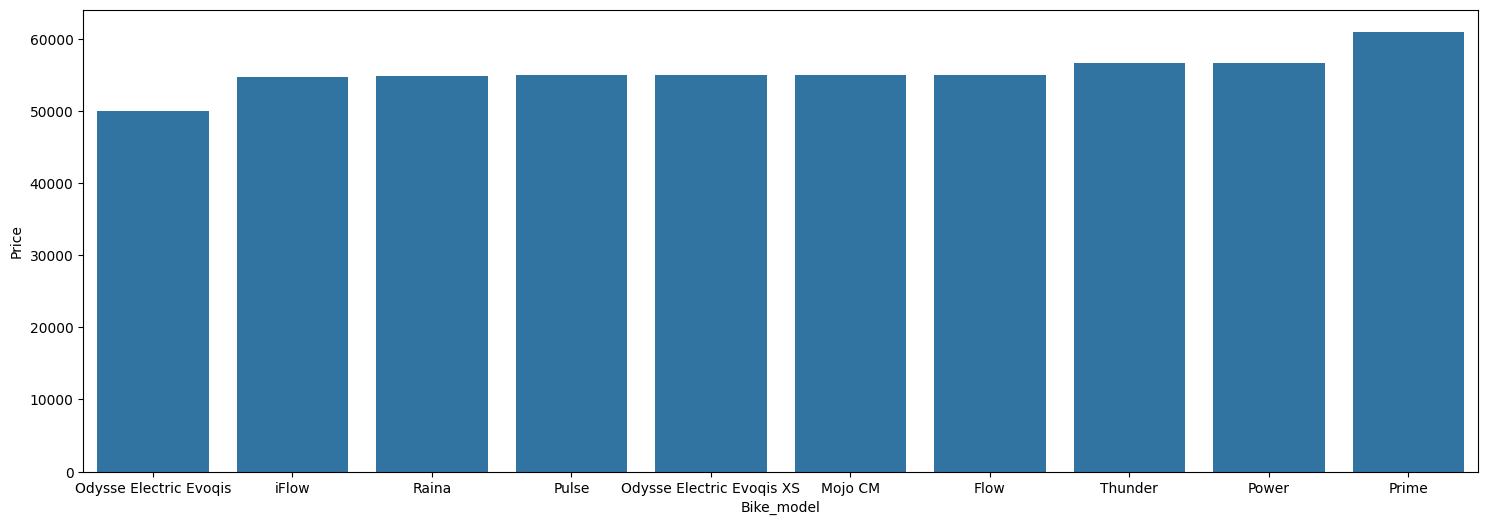

In [39]:
plt.figure(figsize=(18,6))
sns.barplot(x="Bike_model",y="Price",data=top_ten_expensive_bike_model)

In [40]:
cc_with_price = df.groupby("CC(Cubic capacity)")["Price"].mean().sort_values(ascending=True).reset_index().head(10)
cc_with_price

,CC(Cubic capacity),Price
0,110CC,62500.000000
1,167CC,63400.000000
2,134CC,64600.000000
3,10CC,66700.000000
4,135CC,66857.142857
5,120CC,67142.857143
6,235CC,69879.000000
7,145CC,70233.333333
8,125CC,71735.619048
9,176CC,73000.000000


<Axes: xlabel='CC(Cubic capacity)', ylabel='Price'>

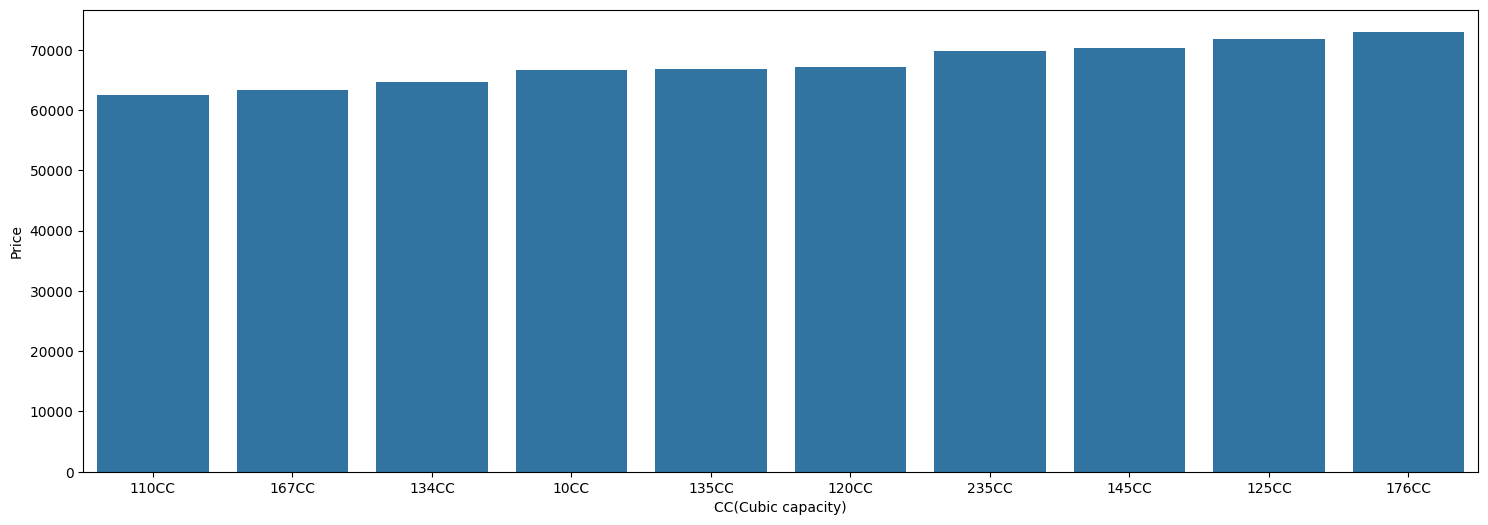

In [41]:
plt.figure(figsize=(18,6))
sns.barplot(x="CC(Cubic capacity)",y="Price",data=cc_with_price)

In [42]:
df['Fuel_Capacity'] = df['Fuel_Capacity'].str.extract('(\d+)').astype(float)
bikemodel_with_fuelcapacity = df.groupby("Bike_model")["Fuel_Capacity"].mean()
bikemodel_with_fuelcapacity = bikemodel_with_fuelcapacity.sort_values(ascending=True)
top_ten_lowest_fuelcapacity = bikemodel_with_fuelcapacity.reset_index().head(10)
print(top_ten_lowest_fuelcapacity)

    Bike_model  Fuel_Capacity
0   Cruise 220           10.0
1         Flow           10.0
2  Avenger 220           10.0
3   Apache XTR           11.0
4   Apache RTR           11.0
5        iFlow           11.0
6     Duke DAM           11.0
7        FZ-SR           12.0
8       Fiesta           12.0
9  Passion Pro           12.0


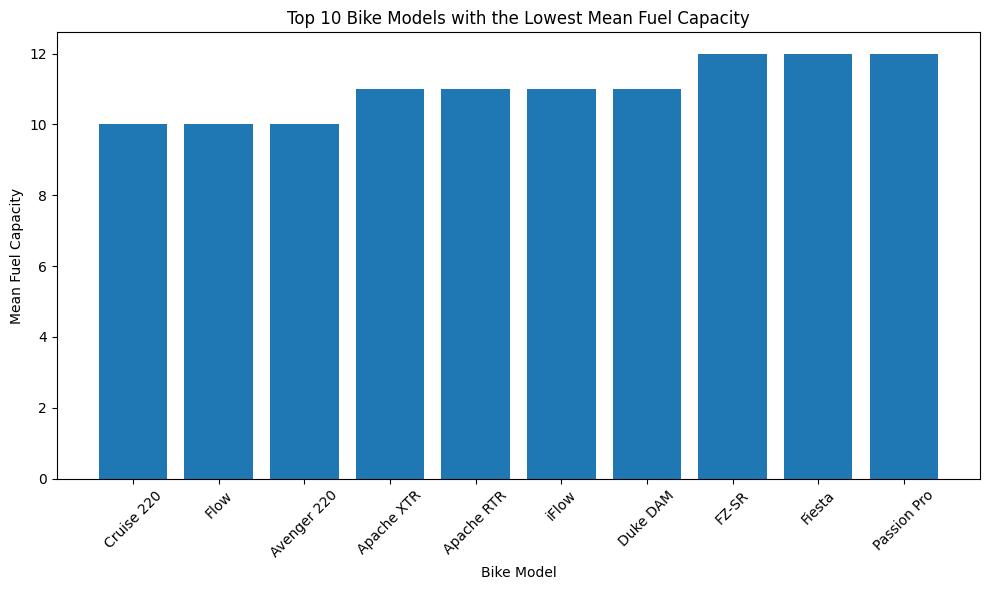

In [43]:
plt.figure(figsize=(10, 6))
plt.bar(top_ten_lowest_fuelcapacity["Bike_model"], top_ten_lowest_fuelcapacity["Fuel_Capacity"])
plt.xlabel("Bike Model")
plt.ylabel("Mean Fuel Capacity")
plt.title("Top 10 Bike Models with the Lowest Mean Fuel Capacity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

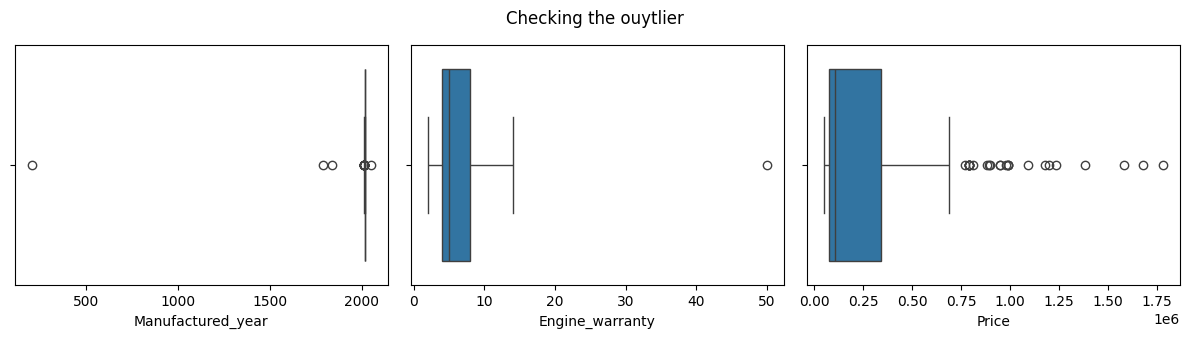

In [44]:
plt.figure(figsize=(12,6))
plt.suptitle("Checking the ouytlier")
for i in range(0,len(numerical_columns)):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[numerical_columns[i]])
    plt.tight_layout()

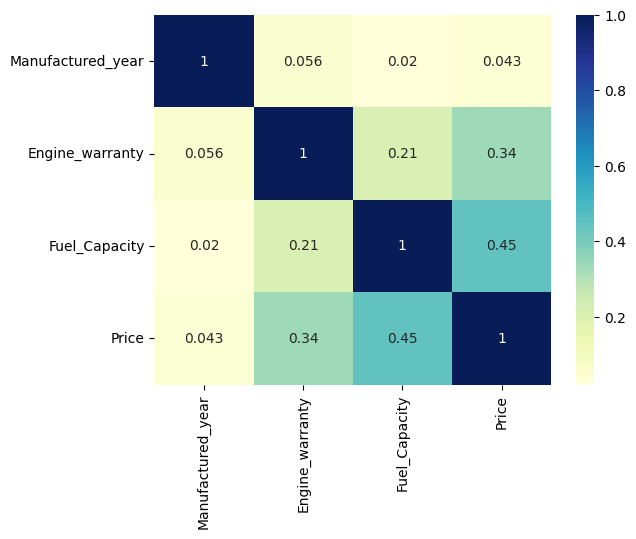

In [45]:
sns.heatmap(df.corr(numeric_only=True),cmap='YlGnBu',annot=True)
plt.show()

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
print(categorical_columns)

Index(['Bike_company', 'Bike_model', 'Engine_type', 'Fuel_type',
       'CC(Cubic capacity)', 'Fuel_Capacity'],
      dtype='object')


In [48]:
cate_to_num = ['Bike_company', 'Bike_model', 'Engine_type', 'Fuel_type']
for col in cate_to_num:
    df[col] = le.fit_transform(df[col])

In [49]:
df.head()

,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,3,18,2020,5.0,3,1,220CC,10.0,113000
1,22,13,2020,5.0,5,1,120CC,11.0,70000
2,9,156,2020,5.0,0,1,140CC,12.0,85000
3,10,9,2020,5.0,3,1,150CC,13.0,90000
4,21,6,2020,5.0,5,1,350CC,14.0,65000


In [50]:
df['Fuel_type'].unique()

array([1, 0])

In [51]:
X = df.drop("Price",axis=1)
y= df["Price"]

In [52]:
X.head()


,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity
0,3,18,2020,5.0,3,1,220CC,10.0
1,22,13,2020,5.0,5,1,120CC,11.0
2,9,156,2020,5.0,0,1,140CC,12.0
3,10,9,2020,5.0,3,1,150CC,13.0
4,21,6,2020,5.0,5,1,350CC,14.0


In [53]:
y.head()


,Price
0,113000
1,70000
2,85000
3,90000
4,65000


In [54]:
categorical_columns_x = X.select_dtypes(include="object").columns
numerical_columns_x = X.select_dtypes(exclude="object").columns

In [55]:
print("categorical_columns_x",categorical_columns_x)
print("numerical_columns_x",numerical_columns_x)

categorical_columns_x Index(['CC(Cubic capacity)'], dtype='object')
numerical_columns_x Index(['Bike_company', 'Bike_model', 'Manufactured_year', 'Engine_warranty',
       'Engine_type', 'Fuel_type', 'Fuel_Capacity'],
      dtype='object')


In [56]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [57]:
numerical_pipeline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

categorical_pipeline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("onehot",OneHotEncoder(sparse=False,handle_unknown="ignore")),
        ("scaler",StandardScaler(with_mean=False)),
    ]
)


preprocessing = ColumnTransformer([
    ("numerical_pipeline",numerical_pipeline,numerical_columns_x),
    ("categorical_pipeline",categorical_pipeline,categorical_columns_x)
])

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [59]:
x_train = preprocessing.fit_transform(x_train)
x_test = preprocessing.transform(x_test)

In [60]:
from sklearn.linear_model import  LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [61]:
def model_evalution(test,predict):
    mse = mean_squared_error(test,predict)
    mae = mean_absolute_error(test,predict)
    rmse = np.sqrt(mse)
    r2score = r2_score(test,predict)
    return mse,mae,rmse,r2score

In [62]:
models = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lesso":Lasso(),
    "Elastic":ElasticNet(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    #"XGBRegressor":XGBRegressor()

}

model_list = []
r2_list = []
y_predict_list = []
trainig_score = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    score = model.score(x_train,y_train)
    # Make Prediction
    y_predict = model.predict(x_test)

    mse,mae,rmse,r2sore = model_evalution(y_test,y_predict)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Traning Performance")
    print("MSE",mse*100)
    print("MAE",mae*100)
    print("RMSE",rmse*100)
    print("R2",r2sore*100)
    print("="*40)
    r2_list.append(r2sore*100)
    y_predict_list.append(y_predict)
    trainig_score.append(score)

LinearRegression
Model Traning Performance
MSE 3.117472499527209e+37
MAE 7.090967106724352e+18
RMSE 5.5834330832626704e+19
R2 -4.834310363929726e+26
Ridge
Model Traning Performance
MSE 3811211239421.2725
MAE 10725067.685502961
RMSE 19522323.73315552
R2 40.89898789274338
Lesso
Model Traning Performance
MSE 3758713396581.167
MAE 10644310.90139315
RMSE 19387401.57055908
R2 41.713079647407994
Elastic
Model Traning Performance
MSE 4287299156255.9004
MAE 12057672.966929767
RMSE 20705794.252469286
R2 33.51622268520937
LinearSVR
Model Traning Performance
MSE 11092054412774.586
MAE 21547581.06284878
RMSE 33304736.01873251
R2 -72.006115893824
DecisionTreeRegressor
Model Traning Performance
MSE 2624853362164.516
MAE 7500722.580645161
RMSE 16201399.205514679
R2 59.296013631452546
RandomForestRegressor
Model Traning Performance
MSE 2400474876687.598
MAE 7583077.758064514
RMSE 15493465.966941027
R2 62.77548374048616
